# Convolutional Neural Networks
<hr style="border:2px solid #ff0000"></hr>

<b>Tovi R. Macalisay</b>
<br>Comp Tech Student

## Imports

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras import layers, models

## Split the Dataset

In [22]:
BATCH_SIZE = 32
IMG_SIZE = (128,128)  
DATA_DIR = 'Assets'   
# para sa validation split 20%
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# normalize niya ang layer
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# optimization
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 677 files belonging to 2 classes.
Using 542 files for training.
Found 677 files belonging to 2 classes.
Using 135 files for validation.


## Model Design

In [23]:
model = models.Sequential([
    layers.Input(shape=(128,128,3)),
    layers.Conv2D(32,(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,705,921 (14.14 MB)

 Trainable params: 3,705,921 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

## Training

In [24]:
model.compile(
    optimizer='adam',               
    loss='binary_crossentropy',      
    metrics=['accuracy']             
)

epochs =20
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 428ms/step - accuracy: 0.6550 - loss: 1.1100 - val_accuracy: 0.6593 - val_loss: 0.5885
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 422ms/step - accuracy: 0.6827 - loss: 0.5702 - val_accuracy: 0.6593 - val_loss: 0.5719
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 311ms/step - accuracy: 0.6827 - loss: 0.5430 - val_accuracy: 0.6593 - val_loss: 0.5591
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 350ms/step - accuracy: 0.6827 - loss: 0.5184 - val_accuracy: 0.6593 - val_loss: 0.5343
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 514ms/step - accuracy: 0.6863 - loss: 0.5076 - val_accuracy: 0.6593 - val_loss: 0.5272
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 349ms/step - accuracy: 0.6827 - loss: 0.5140 - val_accuracy: 0.6519 - val_loss: 0.5397
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 354ms/step - accuracy: 0.6993 - loss: 0.4852 - val_accuracy: 0.6444 - val_loss: 0.5145
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 337ms/step - accuracy: 0.6661 - loss: 0.4719 - val_accuracy: 0

## Graphs

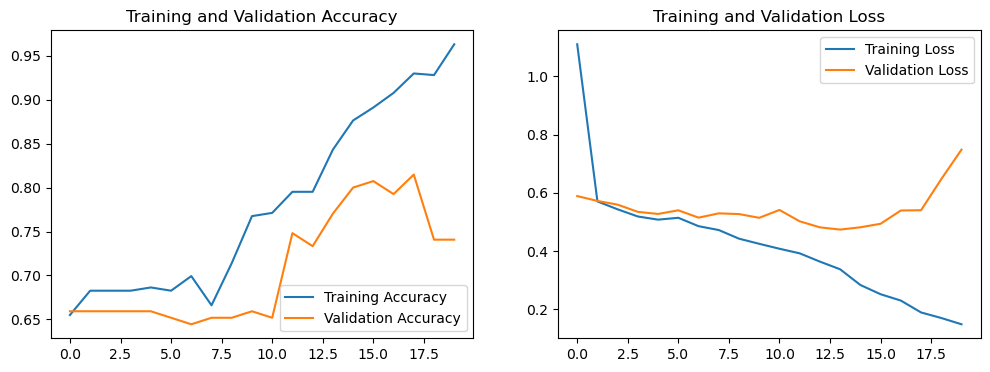

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Images Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
RESULT: Pen
accuracy: 98.52%


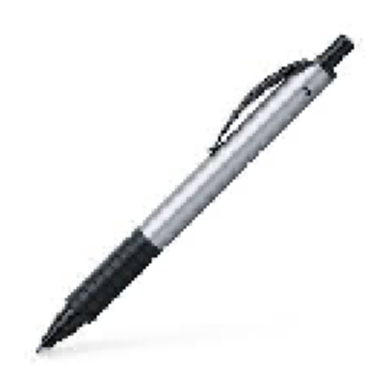

In [ ]:
#
image_path = 'Assets\pen1.jpg'

img = tf.keras.utils.load_img(
    image_path, target_size=(128, 128)
)

img_array = tf.keras.utils.img_to_array(img)

img_array = tf.expand_dims(img_array, 0) 

img_array = img_array / 255.0

predictions = model.predict(img_array)
score = predictions[0][0]

if score > 0.5:
    print(f"RESULT: Pencil")
    print(f"accuracy: {100 * score:.2f}%")
else:
    print(f"RESULT: Pen")
    print(f"accuracy: {100 * (1 - score):.2f}%")

plt.imshow(img)
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
RESULT: Pencil
accuracy: 50.89%


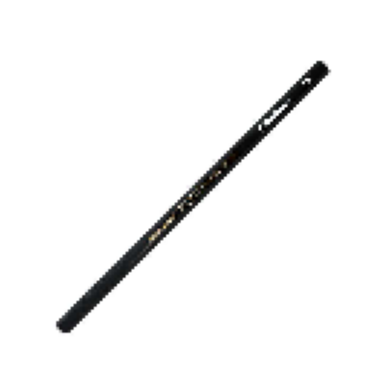

In [27]:
image_path = 'Assets\pencil.jpg'

img = tf.keras.utils.load_img(
    image_path, target_size=(128, 128)
)

img_array = tf.keras.utils.img_to_array(img)

img_array = tf.expand_dims(img_array, 0) 

img_array = img_array / 255.0

predictions = model.predict(img_array)
score = predictions[0][0]

if score > 0.5:
    print(f"RESULT: Pencil")
    print(f"accuracy: {100 * score:.2f}%")
else:
    print(f"RESULT: Pen")
    print(f"accuracy: {100 * (1 - score):.2f}%")

import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
RESULT: Pencil
accuracy: 100.00%


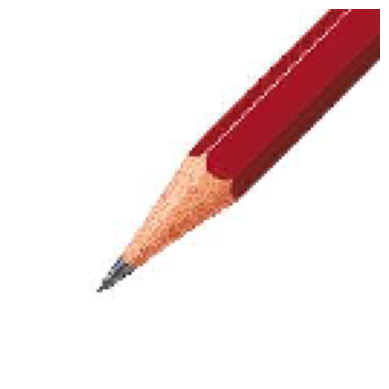

In [28]:
image_path = 'Assets\pencil1.jpg'

img = tf.keras.utils.load_img(
    image_path, target_size=(128, 128)
)

img_array = tf.keras.utils.img_to_array(img)

img_array = tf.expand_dims(img_array, 0) 

img_array = img_array / 255.0

predictions = model.predict(img_array)
score = predictions[0][0]

if score > 0.5:
    print(f"RESULT: Pencil")
    print(f"accuracy: {100 * score:.2f}%")
else:
    print(f"RESULT: Pen")
    print(f"accuracy: {100 * (1 - score):.2f}%")

import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
RESULT: Pen
accuracy: 99.70%


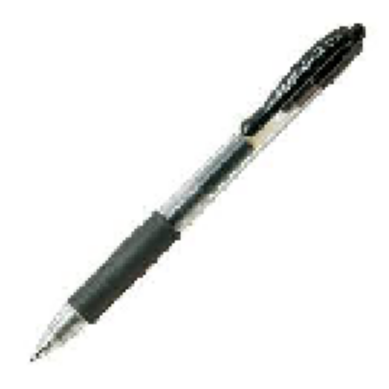

In [29]:
image_path = 'Assets\pen.jpg'

img = tf.keras.utils.load_img(
    image_path, target_size=(128, 128)
)

img_array = tf.keras.utils.img_to_array(img)

img_array = tf.expand_dims(img_array, 0) 

img_array = img_array / 255.0

predictions = model.predict(img_array)
score = predictions[0][0]

if score > 0.5:
    print(f"RESULT: Pencil")
    print(f"accuracy: {100 * score:.2f}%")
else:
    print(f"RESULT: Pen")
    print(f"accuracy: {100 * (1 - score):.2f}%")

import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis('off')
plt.show()

## Reflection

<h4>There is two major problem i encounter while making this model. The first one is when i was making the model design when my model design is too high the training loss is too high as well. Lastly when doing the prediction test for the pen and pencil where the model predict the pencil.jpg that it's a pen and the other way around, i thought the problem was in the training or the model design and the way i fix it is pretty stupid i turn the less than sign to a greater than sign. </h4>